### IBM Stock analysis 2000 2024

 1. Import necesary libraries 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 

In [4]:
data = pd.read_csv(r'C:\Users\LeonardoValencianaRi\Desktop\DataScience-portfolio\ibm-stocks/IBM.csv')

2. Dataset Exploration 

In [5]:
data.head(5)

Date        Open        High         Low       Close  Adj Close  \
0  2000-01-03  107.492828  110.898659  106.955070  110.898659  60.474819   
1  2000-01-04  108.986618  109.464630  105.999046  107.134323  58.422073   
2  2000-01-05  107.970840  114.483749  107.194077  110.898659  60.474819   
3  2000-01-06  112.810707  113.706978  108.508606  108.986618  59.432163   
4  2000-01-07  112.093689  112.750954  105.760040  108.508606  59.171448   

     Volume  
0  10823694  
1   8606279  
2  13318927  
3   8338607  
4  12402108

In [6]:
data.tail(5)

Date        Open        High         Low       Close   Adj Close  \
6113  2024-04-22  182.449997  183.320007  180.449997  181.899994  181.899994   
6114  2024-04-23  182.729996  184.679993  179.000000  182.190002  182.190002   
6115  2024-04-24  183.169998  184.289993  181.399994  184.100006  184.100006   
6116  2024-04-25  168.199997  172.449997  165.660004  168.910004  168.910004   
6117  2024-04-26  167.500000  167.869995  165.729996  167.130005  167.130005   

        Volume  
6113   3076500  
6114   5950200  
6115   7616600  
6116  16702200  
6117   8950900

In [7]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  6118.000000  6118.000000  6118.000000  6118.000000  6118.000000   
mean    125.579954   126.711867   124.528260   125.636983    86.723527   
std      34.379665    34.438329    34.317529    34.385097    32.369403   
min      52.246655    54.206501    51.634800    52.648186    29.144928   
25%      95.881929    97.516733    94.878107    96.058794    54.524976   
50%     124.158699   125.253345   123.078392   124.198032    95.755165   
75%     147.791587   148.929810   146.931168   147.954117   112.386995   
max     205.908218   206.405350   204.875717   206.309753   197.779999   

             Volume  
count  6.118000e+03  
mean   6.181656e+06  
std    3.449506e+06  
min    1.074765e+06  
25%    3.919796e+06  
50%    5.313628e+06  
75%    7.427358e+06  
max    4.310284e+07

In [8]:
data.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

3. Exploratory Data Analysis 

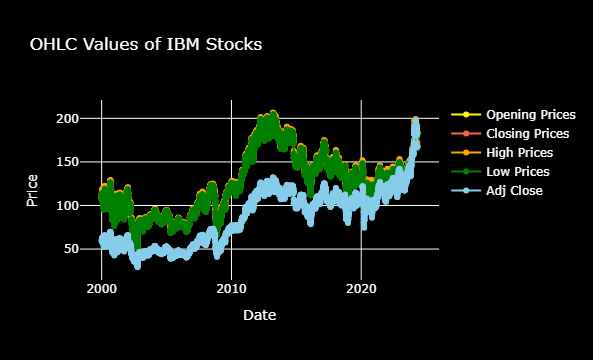

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], mode='lines+markers', name='Opening Prices', marker=dict(color='yellow')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines+markers', name='Closing Prices', marker=dict(color='tomato')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['High'], mode='lines+markers', name='High Prices', marker=dict(color='orange')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Low'], mode='lines+markers', name='Low Prices', marker=dict(color='green')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Adj Close'], mode='lines+markers', name='Adj Close', marker=dict(color='skyblue')))
fig.update_layout(title='OHLC Values of IBM Stocks', xaxis_title='Date', yaxis_title='Price', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

In [10]:
# Create a column with tomorrow's closing prices 
data['Tom Price'] = data['Close'].shift(-1)

In [11]:
# Create a column with the price difference 
data['Price Diff'] = data['Tom Price'] - data['Close']

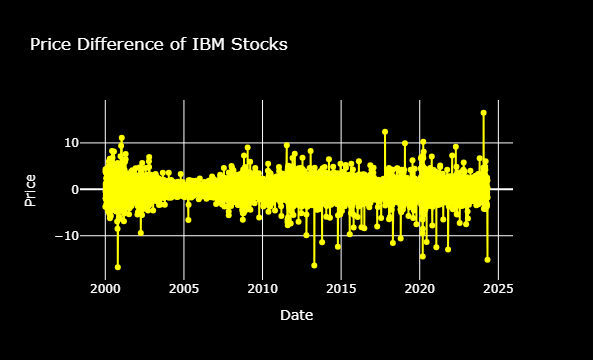

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Price Diff'], mode='lines+markers', name='Opening Prices', marker=dict(color='yellow')))
fig.update_layout(title='Price Difference of IBM Stocks', xaxis_title='Date', yaxis_title='Price', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

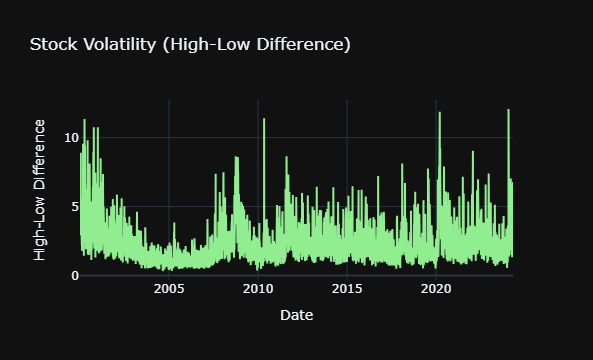

In [15]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

df['High_Low_Diff'] = data['High'] - data['Low']

# Create a line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['High_Low_Diff'], mode='lines', name='High-Low Difference', line = dict(color = 'lightgreen')))

fig.update_layout(title='Stock Volatility (High-Low Difference)',
                xaxis_title='Date',
                yaxis_title='High-Low Difference',
                template='plotly_dark')

fig.show()

In [16]:
data['Daily Return'] = data['Price Diff'] / data['Close']

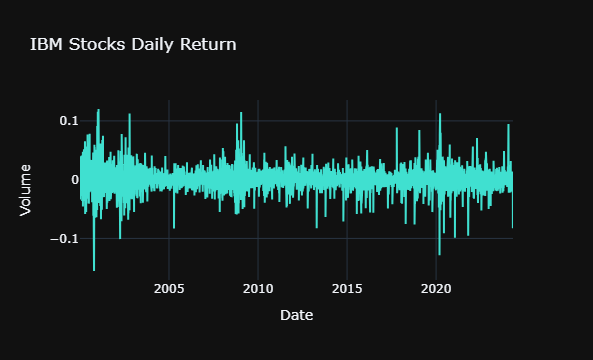

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data['Date'], y = data['Daily Return'], mode='lines', name='High-Low Difference', line = dict(color = 'turquoise')))

fig.update_layout(title='IBM Stocks Daily Return',
                xaxis_title='Date',
                yaxis_title='Volume',
                template='plotly_dark')

fig.show()

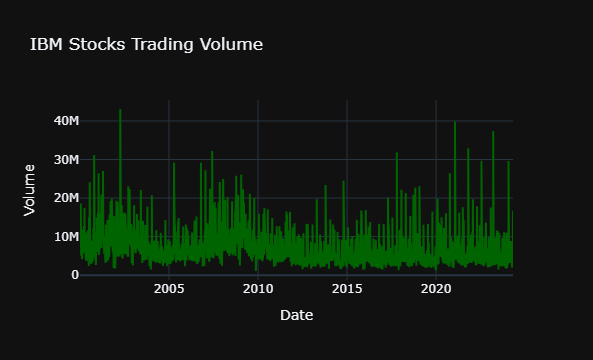

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data['Date'], y = data['Volume'], mode='lines', name='High-Low Difference', line = dict(color = 'darkgreen')))

fig.update_layout(title='IBM Stocks Trading Volume',
                xaxis_title='Date',
                yaxis_title='Volume',
                template='plotly_dark')

fig.show()

4. Predicting Future Stock Prices 

In [25]:
!pip install -q yfinance
!pip install pandas_datareader
print("Module installed")

Module installed


In [32]:
from pandas_datareader.data import DataReader
import pandas
import yfinance as yf
import pandas_datareader.data as pdr
from sklearn.preprocessing import MinMaxScaler


# For time stamps
from datetime import datetime
print("Setup Complete")

Setup Complete


In [33]:
# Create a new dataframe with only the 'Close column 
data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

5813

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.3790829 ],
       [0.35458533],
       [0.3790829 ],
       ...,
       [0.85546323],
       [0.75660961],
       [0.74502572]])

In [35]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.3790829 , 0.35458533, 0.3790829 , 0.36663971, 0.3635289 ,
       0.39152615, 0.39774777, 0.40085858, 0.39308155, 0.40163626,
       0.3775275 , 0.40085858, 0.39774777, 0.41330182, 0.41330182,
       0.39852544, 0.38374912, 0.3635289 , 0.35147452, 0.35575187,
       0.34175322, 0.3635289 , 0.38608225, 0.37674982, 0.36741738,
       0.39658123, 0.38763766, 0.39852544, 0.37519441, 0.37947176,
       0.38608225, 0.3775275 , 0.38374912, 0.35730728, 0.34797485,
       0.33397624, 0.34486403, 0.32931003, 0.30753435, 0.29664656,
       0.28109251, 0.29897965, 0.32931003, 0.29859078, 0.29820192,
       0.31842219, 0.32931003, 0.31220056, 0.32736576, 0.33319852,
       0.3230884 , 0.3355316 , 0.34175322, 0.35886268, 0.3635289 ,
       0.36819511, 0.37441669, 0.40785788, 0.44674296, 0.41952339])]
[0.3977477660370337]

[array([0.3790829 , 0.35458533, 0.3790829 , 0.36663971, 0.3635289 ,
       0.39152615, 0.39774777, 0.40085858, 0.39308155, 0.40163626,
       0.3775275 , 0.40085858, 0.397

In [42]:
!pip install keras
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.w

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\LeonardoValencianaRi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse